<a href="https://colab.research.google.com/github/sorinnicumarian/stock_prediction_linear_regression/blob/main/Medium_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspired from https://medium.com/@varun.tyagi83/stock-price-prediction-with-machine-learning-02c9cce35aab

[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])


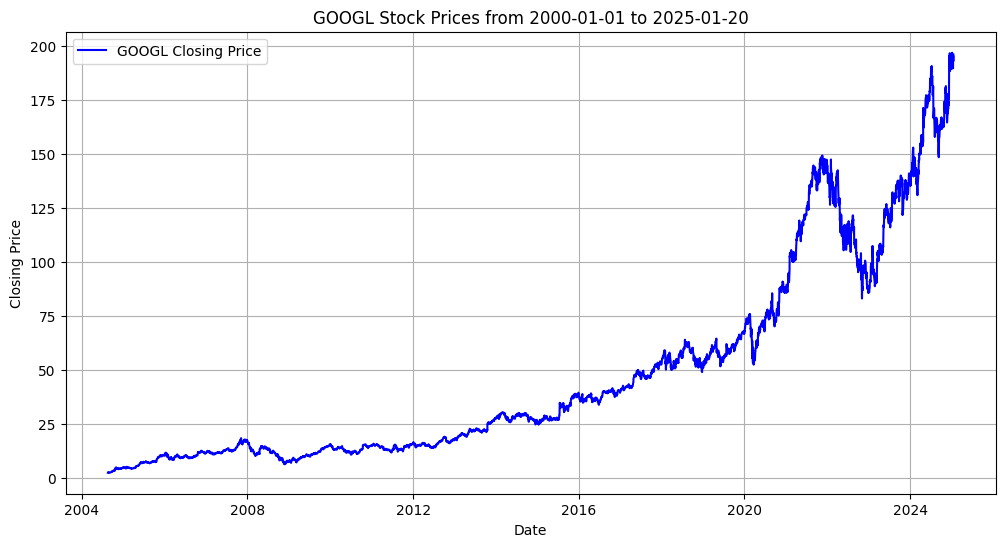


Predicted Stock Price for the next day: 192.94

Model Evaluation Results:
R-squared: 0.9912
Adjusted R-squared: 0.99
Mean Squared Error on Test Data: 6.22


In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt

# Main function to bring everything together
def main():
    ticker = 'GOOGL'  # Stock ticker symbol
    start_date = '2000-01-01'  # Start date of data (from the beginning of time)
    end_date = '2025-01-20'  # Current date

    # Download and display stock data
    stock_data = download_stock_data(ticker, start_date, end_date)
    plot_stock_data(stock_data, ticker, start_date, end_date)

    # Preprocess the data into sequences
    sequence_length = 10  # Length of each sequence
    data_sequences = preprocess_data(stock_data, sequence_length)

    # Split data into training and testing sets
    train_data, test_data = split_data(data_sequences)

    # Prepare training and testing data
    X_train = np.array([item[0] for item in train_data])
    y_train = np.array([item[1] for item in train_data])
    X_test = np.array([item[0] for item in test_data])
    y_test = np.array([item[1] for item in test_data])

    # Train the model
    model = train_model(X_train, y_train)

    # Use the last sequence from the test set to predict the next price
    last_sequence = X_test[-1].reshape(1, -1)
    predicted_price = model.predict(last_sequence).item()  # Extract the scalar value
    print(f'\nPredicted Stock Price for the next day: {predicted_price:.2f}')

    # Evaluate the model's performance
    mse, r2, adjusted_r2 = evaluate_model(model, X_test, y_test)

    # Print the results
    print(f'\nModel Evaluation Results:')
    print(f'R-squared: {r2:.4f}')
    print(f'Adjusted R-squared: {adjusted_r2:.2f}')
    print(f'Mean Squared Error on Test Data: {mse:0.2f}')

# Download stock price data from Yahoo Finance
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data.columns)  # Print the columns to inspect the structure

    # We use the .xs() method to select data for the ticker 'GOOGL' from the multi-indexed columns
    # Ensure that we select 'Close' price for GOOGL from the DataFrame
    return stock_data['Close']  # Select the 'Close' price column directly

# Preprocess data by creating input sequences
def preprocess_data(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].values.flatten()  # Flatten sequence of features
        target = data.iloc[i + sequence_length]  # Target is the next value
        sequences.append((sequence, target))
    return sequences

# Split the data into training and testing sets
def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

# Train the linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate the model's performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Adjust R-squared for the number of features
    n = X_test.shape[0]  # Number of samples
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return mse, r2, adjusted_r2

# Plot stock data
def plot_stock_data(stock_data, ticker, start_date, end_date):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data, label=f'{ticker} Closing Price', color='blue')
    plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()